In [13]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline 

# Understanding `make_classification()` Output and Array Indexing

## What Does `make_classification()` Return?

When you call the function:

```python
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_classes=2,
    random_state=42
)
```
## Given Data

You receive two arrays:

| Variable | Type          | Shape     | Description |
|---------|---------------|-----------|-------------|
| `X`     | 2D NumPy array | (100, 20) | Feature matrix containing all input data |
| `y`     | 1D NumPy array | (100,)    | Target vector containing class labels |

---

## Key Points

- **`X` (Features):** Contains **100 samples**, each with **20 features**
- **`y` (Labels):** Contains **100 binary class labels** (`0` or `1`)

---

## Understanding "20 Features"

When `n_features = 20`, each data point exists in a **20-dimensional space**.

That means:

- Each row of `X` is one data sample.
- Each row has 20 values (features).

So a single sample looks like:

$
x^{(i)} = [x_1, x_2, x_3, \dots, x_{20}]
$

Example:

- `X[0]` → the **1st sample**, shape `(20,)`
- `X[0][5]` → the **6th feature** of the 1st sample

---

## Quick Intuition

You can imagine each sample as a point in 20D space:

- 2 features → point on a 2D plane  
- 3 features → point in 3D space  
- 20 features → point in 20D space (your brain refuses to visualize this, which is fair)

---

## Summary

- `X.shape = (100, 20)` → 100 samples, 20 features each  
- `y.shape = (100,)` → 100 labels, one per sample  
- Each sample is a vector in **20-dimensional feature space**

---
## Understanding "20 Features"

When `n_features = 20`, each data point exists in a **20-dimensional space**.

Mathematically, each sample \( i \) is represented as:

\[
X[i] = [x_0, x_1, x_2, \dots, x_{19}]
\]

Where:

- Each \( x_j \) represents one **feature value**
- The entire vector forms a **single point in 20D space**
- The corresponding label \( y[i] \) is either **0** or **1**


---

## Understanding Array Indexing: `X[:, 0]` and `X[:, 1]`

### The Structure of Array `X`

`X` is a 2D NumPy array of shape `(100, 20)`:

- **100 rows** → 100 samples  
- **20 columns** → 20 features  

So the array looks like this:

$
X =
\begin{bmatrix}
x_{0,0} & x_{0,1} & \dots & x_{0,19} \\
x_{1,0} & x_{1,1} & \dots & x_{1,19} \\
\vdots  & \vdots  & \ddots & \vdots \\
x_{99,0} & x_{99,1} & \dots & x_{99,19}
\end{bmatrix}
$

---

### Sample-wise View

Each row is one sample:

- **Sample 0:**
$ X[0] = [x_{0,0}, x_{0,1}, \dots, x_{0,19}] $

- **Sample 1:**
$ X[1] = [x_{1,0}, x_{1,1}, \dots, x_{1,19}] $

- **Sample 99:**
$ X[99] = [x_{99,0}, x_{99,1}, \dots, x_{99,19}] $

---

## Meaning of `X[:, 0]`

$ X[:,0] $
- `:` means **all rows**
- `0` means **first column (feature 0)**

So this extracts the **0th feature from every sample**:

$
X[:,0] =
\begin{bmatrix}
x_{0,0} \\
x_{1,0} \\
\vdots \\
x_{99,0}
\end{bmatrix}
$

This output has shape: $ (100,) $



The notation `X[:, 0]` means:

- `:` → Select **all rows** (all 100 samples)
- `0` → Select **column 0** (the first feature)

This returns a **1D array**:


$
X[:,0] = [X[0,0], X[1,0], X[2,0], \dots, X[99,0]]
$


---

## Meaning of `X[:, 1]`

$ X[:,1] $

This extracts the **1st feature from every sample**:
$
X[:,1] =
\begin{bmatrix}
x_{0,1} \\
x_{1,1} \\
\vdots \\
x_{99,1}
\end{bmatrix}
$

This output also has shape: $ (100,) $



`X[:, 1]` selects:

- **All rows** (100 samples)
- **Column 1** (the second feature)

This returns a **1D array**:

$
X[:,1] = [X[0,1], X[1,1], X[2,1], \dots, X[99,1]]
$


---

## Summary

- `X[:,0]` → all samples, **feature 0**
- `X[:,1]` → all samples, **feature 1**
- Both return vectors of length **100**

---


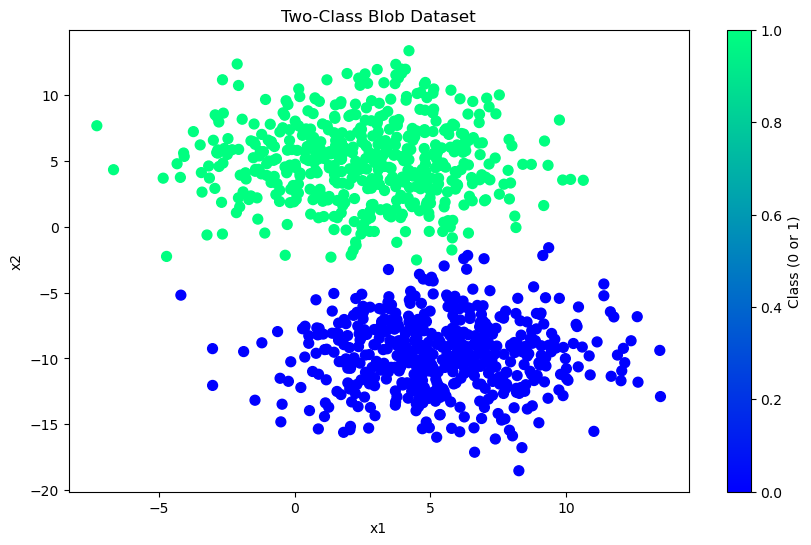

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples=1000,
    centers=2,
    n_features=2,
    cluster_std=3.0,
    random_state=10
)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    X[:, 0], X[:, 1],
    s=50,
    c=y,
    cmap="winter"
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Two-Class Blob Dataset")

plt.colorbar(scatter, label="Class (0 or 1)")
plt.show()


In [15]:
import pandas as pd

df = pd.DataFrame(X, columns=["x1", "x2"])
df["class"] = y

print('x1 and x2 are coordinates: \n',df.head())


x1 and x2 are coordinates: 
          x1         x2  class
0  6.559672  -4.741737      0
1  4.309166 -12.486939      0
2  4.456809  -7.592524      0
3  3.732543   5.481068      1
4  4.421649   6.817757      1


# Perceptron

### Step1:
Your class: y=df['class'] right now is `{0, 1}`.
A perceptron prefers `{−1, +1}`, so first we fix that.

In [16]:
import numpy as np

# convert labels from {0,1} → {-1,+1}
y_perc = np.where(y == 0, -1, 1)


### Step2:
Define the Perceptron __(step activation + hinge loss)__

In [17]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.ones(n_features)
        self.b = 0.0

        for _ in range(self.epochs):
            for xi, yi in zip(X, y):
                z = np.dot(self.w, xi) + self.b

                # hinge loss condition
                if yi * z < 1:
                    self.w += self.lr * yi * xi
                    self.b += self.lr * yi

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        return np.where(z >= 0, 1, -1)


### Step 3: Train the perceptron

In [18]:
perc = Perceptron(lr=0.01, epochs=50)
perc.fit(X, y_perc)


### Step 4: Plot the decision boundary

Decision boundary is the line corresponding to probability is 1/2

In [19]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, zz, alpha=0.3, cmap='winter')
    plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='winter')
    plt.show()


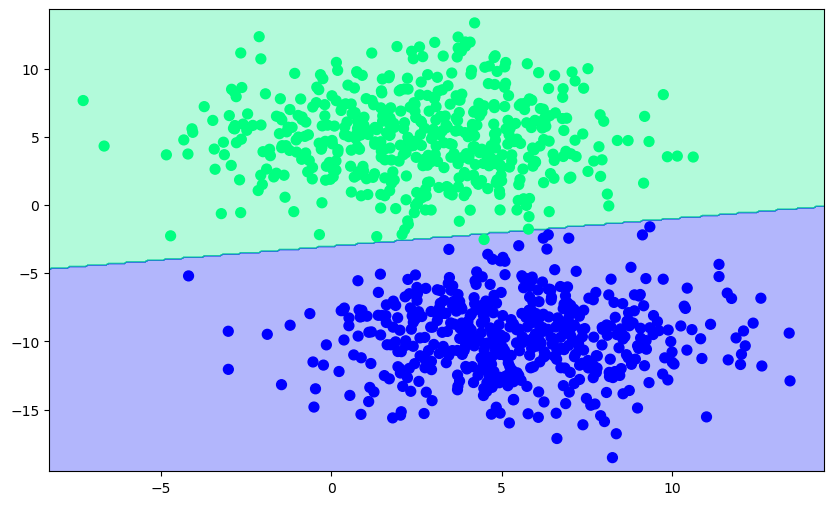

In [20]:
plot_decision_boundary(X, y_perc, perc)


# Define the Perceptron (sigmoid activation + binary cross-entropy loss)

- Activation → logistic (sigmoid)

- Loss → binary cross-entropy

### Step 1: Keep labels as {0,1}

Good news: your make_blobs labels already work.
Do NOT convert to −1/+1 here.

### Step 2: Define Logistic + Binary Cross-Entropy (from scratch)

In [21]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, lr=0.1, epochs=200):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            y_hat = self.sigmoid(z)

            # gradients of binary cross-entropy
            dw = (1 / n_samples) * np.dot(X.T, (y_hat - y))
            db = (1 / n_samples) * np.sum(y_hat - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


### Step 3: Train on your blob data

In [22]:
logreg = LogisticRegressionScratch(lr=0.1, epochs=300)
logreg.fit(X, y)


### Step 4: Plot the decision boundary

In [23]:
def plot_decision_boundary_logistic(X, y, model):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid).reshape(xx.shape)

    plt.figure(figsize=(10,6))

    # Probability background
    plt.contourf(xx, yy, probs, levels=20, cmap='winter', alpha=0.4)
    plt.colorbar(label="P(class=1)")

    # Decision boundary p=0.5
    plt.contour(xx, yy, probs, levels=[0.5], colors='red', linewidths=2)

    # Data points
    plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='winter', edgecolor="k")

    plt.show()


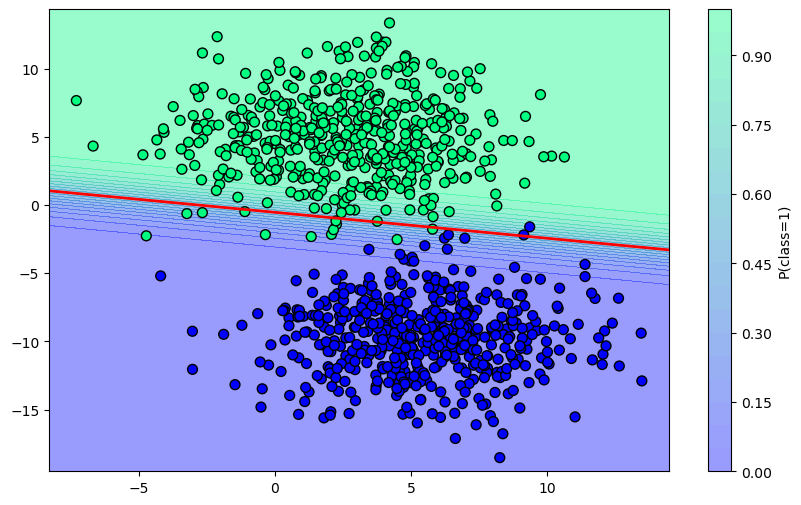

In [24]:
plot_decision_boundary_logistic(X, y, logreg)
